| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./05_Intervalos_de_Confianza.ipynb)| [⏩](./07_Analisis_de_varianza_unidireccional.ipynb)|

# **06 Prueba de Importancia**

## **6.1 Utilización de simulaciones informáticas en lugar de cálculos**

La utilización de simulaciones informáticas en estadística es un enfoque poderoso que permite a los investigadores y analistas de datos realizar experimentos virtuales para explorar resultados potenciales, probar hipótesis y entender la variabilidad de los datos sin depender exclusivamente de fórmulas matemáticas y cálculos manuales. Este enfoque es particularmente útil cuando los modelos son complejos, las distribuciones no son estándar, o cuando se desea entender el comportamiento de un estadístico bajo diferentes condiciones de muestreo.

**Ventajas de las Simulaciones Informáticas**

- **Flexibilidad:** Permite explorar una amplia gama de escenarios y modelos que podrían ser difíciles de analizar analíticamente.

- **Comprensión Profunda:** Ayuda a visualizar y entender la distribución de los estadísticos de interés, como medias, medianas, varianzas, etc., bajo diferentes suposiciones.

- **Accesibilidad:** Hace accesibles los métodos estadísticos avanzados a quienes no tienen una formación profunda en matemáticas.

**Ejemplo: Simulación del Teorema del Límite Central**

Un ejemplo clásico del uso de simulaciones informáticas es demostrar el Teorema del Límite Central (TLC), que establece que la distribución de la media de muestras tomadas de una población (con una media $(\mu)$ y una desviación estándar $(\sigma)$ tenderá a una distribución normal a medida que el tamaño de la muestra aumenta, sin importar la forma de la distribución de la población.

No usaremos fórmulas matemáticas específicas aquí, sino que simularémos el proceso de muestreo para ilustrar el TLC.

Supongamos que tenemos una población con una distribución uniforme (no normal) y queremos observar cómo la distribución de las medias muestrales se aproxima a una distribución normal a medida que aumenta el tamaño de la muestra.

Generaremos múltiples muestras de esta población, calcularemos sus medias y visualizaremos la distribución de estas medias.

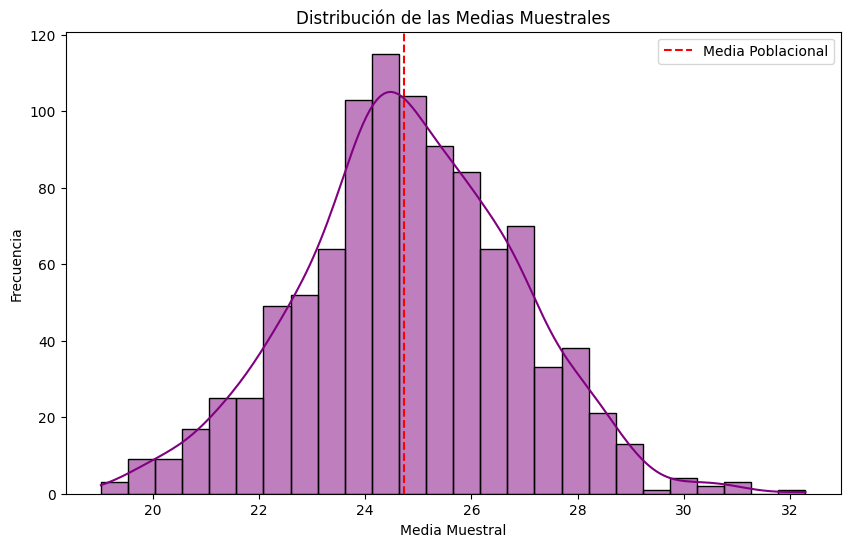

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generando una población con una distribución uniforme
np.random.seed(18)
poblacion = np.random.uniform(0, 50, 10000)

# Tamaño de las muestras y número de muestras
n_muestras = 1000
tamaño_muestra = 50

# Calculando las medias de las muestras
medias_muestrales = [np.mean(np.random.choice(poblacion, tamaño_muestra, replace=True)) for _ in range(n_muestras)]

# Creando un DataFrame para las medias muestrales
df_medias_muestrales = pd.DataFrame({'Medias Muestrales': medias_muestrales})

# Gráfico de la distribución de las medias muestrales
plt.figure(figsize=(10, 6))
sns.histplot(df_medias_muestrales['Medias Muestrales'], kde=True, color='purple')
plt.title('Distribución de las Medias Muestrales')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.axvline(x=np.mean(poblacion), color='red', linestyle='--', label='Media Poblacional')
plt.legend()
plt.show()

La distribución de las medias muestrales, generadas a partir de 1000 muestras de tamaño 50 de una población con una distribución uniforme, muestra una forma que se aproxima a la distribución normal. Esto se evidencia en el histograma, donde las medias muestrales se agrupan alrededor de la media poblacional (línea roja discontinua), demostrando el efecto del Teorema del Límite Central.

Este ejemplo ilustra cómo las simulaciones informáticas pueden ser utilizadas para entender conceptos estadísticos fundamentales y para explorar las propiedades de los estimadores estadísticos bajo diferentes condiciones. A través de la simulación, podemos visualizar y confirmar la validez del TLC, incluso cuando la distribución subyacente de la población no es normal. Esta es solo una de las muchas aplicaciones de las simulaciones informáticas en estadística, las cuales ofrecen una herramienta valiosa para el análisis de datos y la toma de decisiones basada en evidencia.

## **6.2 Utilización de la ley de los grandes números para aproximar cantidades de interés (El método Monte Carlo)**

La **Ley de los Grandes Números (LGN)** y el **método de Monte Carlo** son conceptos fundamentales en probabilidad y estadística que permiten aproximar cantidades de interés mediante simulaciones. Mientras que la LGN proporciona una base teórica que asegura la convergencia de las medias muestrales hacia la media poblacional a medida que el tamaño de la muestra aumenta, el método de Monte Carlo utiliza este principio para realizar estimaciones numéricas de cantidades complejas a través de la generación de muestras aleatorias.

**Ley de los Grandes Números (LGN)**

La LGN establece que, bajo ciertas condiciones, el promedio de una secuencia de observaciones independientes e idénticamente distribuidas (i.i.d.) se aproximará a la expectativa matemática de la observación a medida que el número de observaciones aumente. En términos simples, a medida que tomamos más muestras, la media muestral se acercará a la media poblacional.

**Método de Monte Carlo**

El método de Monte Carlo se utiliza para aproximar cantidades que pueden ser difíciles de calcular de forma directa. Utiliza la generación aleatoria de números o muestras para simular procesos o sistemas complejos y para estimar parámetros estadísticos, áreas, volúmenes, integrales, entre otros.

**Aplicación básica del Método de Monte Carlo:**

Para estimar el valor de $(\pi)$, podemos:
1. Generar puntos aleatorios dentro de un cuadrado que encierra un cuarto de círculo.
2. Calcular la proporción de puntos que caen dentro del cuarto de círculo.
3. Usar esa proporción para estimar el área del círculo y, por ende, el valor de $(\pi)$.

**Ejemplo: Estimación de $(\pi)$ usando el Método de Monte Carlo**

Vamos a estimar el valor de $(\pi)$ generando puntos aleatorios y utilizando la proporción de puntos que caen dentro de un cuarto de círculo de radio 1. La fórmula para estimar $(\pi)$ es:

$\pi \approx 4 \times \frac{\text{número de puntos dentro del círculo}}{\text{número total de puntos}}$

Generaremos puntos aleatorios y visualizaremos cómo se aproxima nuestra estimación a $(\pi)$ a medida que aumenta el número de puntos generados.

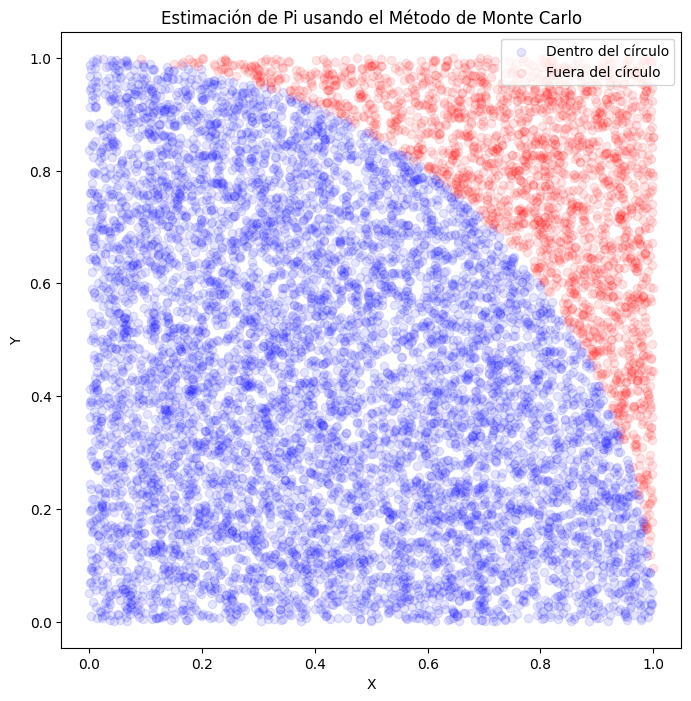

Estimación de Pi: 3.1576


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Número de puntos a generar para la simulación
n_puntos = 10000

# Generando puntos aleatorios dentro del cuadrado [0, 1] x [0, 1]
x = np.random.uniform(0, 1, n_puntos)
y = np.random.uniform(0, 1, n_puntos)

# Calculando la distancia al origen para cada punto y determinando si está dentro del círculo
distancias = np.sqrt(x**2 + y**2)
puntos_dentro_circulo = distancias <= 1

# Estimando pi
estimacion_pi = 4 * np.sum(puntos_dentro_circulo) / n_puntos

# Gráfico de los puntos y el cuarto de círculo
plt.figure(figsize=(8, 8))
plt.scatter(x[puntos_dentro_circulo], y[puntos_dentro_circulo], color='blue', alpha=0.1, label='Dentro del círculo')  # Reducir alpha para mejorar rendimiento
plt.scatter(x[~puntos_dentro_circulo], y[~puntos_dentro_circulo], color='red', alpha=0.1, label='Fuera del círculo')  # Reducir alpha para mejorar rendimiento
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Estimación de Pi usando el Método de Monte Carlo')
plt.axis('equal')
plt.legend(loc='upper right')  # Especificar ubicación de la leyenda
plt.show()

print("Estimación de Pi:", estimacion_pi)

La simulación del Método de Monte Carlo para estimar el valor de $(\pi)$ generó 10,000 puntos aleatorios dentro de un cuadrado de lado 1. Basándonos en la proporción de puntos que caen dentro del cuarto de círculo, nuestra estimación de $(\pi)$ es aproximadamente $(3.1576)$.

El gráfico muestra la distribución de puntos dentro y fuera del cuarto de círculo. Los puntos azules representan aquellos dentro del cuarto de círculo, mientras que los puntos rojos representan los que están fuera. La aproximación a $(\pi)$ se basa en la proporción de puntos dentro del cuarto de círculo respecto al total de puntos generados, multiplicada por 4, siguiendo la lógica de que el área de un círculo es $(\pi r^2)$ y el área del cuadrado es $(1^2)$ para un círculo de radio 1.

Este ejemplo ilustra cómo el Método de Monte Carlo puede ser utilizado para estimar cantidades que de otro modo serían difíciles de calcular directamente. A través de la generación de muestras aleatorias y la aplicación de principios estadísticos básicos, este método ofrece una herramienta poderosa para la aproximación numérica en una amplia gama de aplicaciones.

## **6.3 Principio de enchufe (El Bootstrap)**

El **Principio de Enchufe (Plug-in Principle)** en estadística, particularmente en el contexto del **Bootstrap**, se refiere a la idea de reemplazar parámetros poblacionales desconocidos con estimaciones basadas en muestras para realizar inferencias sobre la población. En el caso del Bootstrap, este principio se aplica al reemplazar la distribución poblacional desconocida por la distribución empírica de la muestra y luego generar "muestras re-muestreadas" de esta última para estimar la distribución del estadístico de interés.

**Bootstrap: Concepto y Aplicación**

El método **Bootstrap** es una técnica de re-muestreo con reemplazo que permite estimar la distribución de casi cualquier estadístico a partir de los datos disponibles. Se basa en tomar repetidamente muestras del mismo tamaño de la muestra original y calcular el estadístico de interés para cada una de estas "muestras bootstrap". Esto produce una distribución de muestras del estadístico, de la cual se pueden derivar estimaciones de su varianza, intervalos de confianza, y más.

**Fórmula Básica del Bootstrap para el Error Estándar**

Aunque el Bootstrap no se basa en fórmulas matemáticas específicas para su implementación, el error estándar de un estadístico calculado a partir de muestras bootstrap, por ejemplo, puede estimarse como sigue:

$\text{Error Estándar Bootstrap} = \sqrt{\frac{1}{B-1} \sum_{i=1}^{B} \left(\theta^*_i - \theta^*_{\cdot}\right)^2}$

Donde:

- $(B)$ es el número de muestras bootstrap,
- $(\theta^*_i)$ es el estimador (por ejemplo, la media) de la i-ésima muestra bootstrap,
- $(\theta^*_{\cdot})$ es la media de los $(\theta^*_i)$ de todas las muestras bootstrap.

**Ejemplo: Estimando el Error Estándar de la Media con Bootstrap**

Supongamos que queremos estimar el error estándar de la media de una muestra utilizando el método Bootstrap. Generaremos una muestra de datos simulados, aplicaremos el método Bootstrap para re-muestrear esta muestra, y calcularemos el error estándar de la media de las muestras bootstrap.

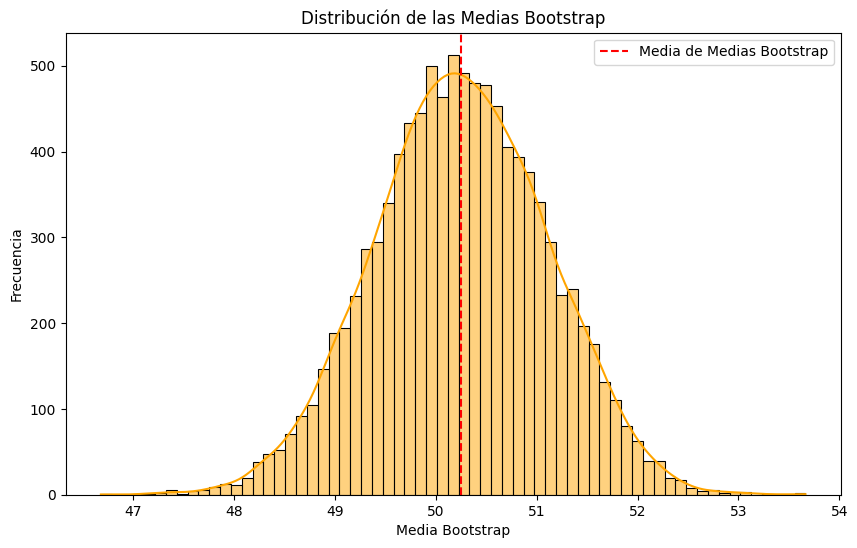

0.8546065980152907

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generando una muestra de datos simulados
np.random.seed(19)
muestra_datos = np.random.normal(50, 10, 100)  # media=50, sd=10, n=100

# Aplicando el método Bootstrap
B = 10000  # Número de muestras bootstrap
medias_bootstrap = []

for _ in range(B):
    muestra_bootstrap = np.random.choice(muestra_datos, size=len(muestra_datos), replace=True)
    media_bootstrap = np.mean(muestra_bootstrap)
    medias_bootstrap.append(media_bootstrap)

# Calculando el error estándar Bootstrap de la media
media_medias_bootstrap = np.mean(medias_bootstrap)
error_estandar_bootstrap = np.sqrt(np.sum((medias_bootstrap - media_medias_bootstrap)**2) / (B-1))

# Creando un DataFrame para las medias bootstrap y generando un gráfico
df_medias_bootstrap = pd.DataFrame({'Medias Bootstrap': medias_bootstrap})

plt.figure(figsize=(10, 6))
sns.histplot(df_medias_bootstrap['Medias Bootstrap'], kde=True, color='orange')
plt.title('Distribución de las Medias Bootstrap')
plt.xlabel('Media Bootstrap')
plt.ylabel('Frecuencia')
plt.axvline(x=media_medias_bootstrap, color='red', linestyle='--', label='Media de Medias Bootstrap')
plt.legend()
plt.show()

error_estandar_bootstrap

La distribución de las medias calculadas a partir de 10,000 muestras bootstrap muestra cómo varían estas medias alrededor de la media de todas las medias bootstrap, marcada por la línea roja discontinua. Este es un ejemplo visual del método bootstrap en acción, proporcionando una forma empírica de entender la distribución de la media de la muestra y su error estándar.

El error estándar de la media, estimado utilizando el método bootstrap, es aproximadamente $(0.85)$. Este valor representa la variabilidad o incertidumbre alrededor de la estimación de la media poblacional basada en la muestra original, calculada a partir de la dispersión de las medias de las muestras bootstrap alrededor de su media.

Este ejemplo ilustra cómo el principio de enchufe y el método bootstrap pueden ser utilizados para estimar el error estándar de un estadístico (en este caso, la media) de una manera relativamente sencilla y sin necesidad de asumir una distribución específica de los datos. Es una herramienta valiosa en situaciones donde las técnicas analíticas tradicionales son difíciles de aplicar

## **6.4 El bootstrap paramétrico y los intervalos de confianza del bootstrap**

El **bootstrap paramétrico** es una variante del método de bootstrap que, en lugar de re-muestrear directamente los datos observados, ajusta un modelo paramétrico a los datos y luego genera muestras re-muestreadas a partir de este modelo. Esto es particularmente útil cuando se tiene conocimiento previo sobre la distribución de los datos o cuando la muestra original es muy pequeña.

**Proceso del Bootstrap Paramétrico**

1. **Ajuste del Modelo Paramétrico:** A partir de la muestra original, estimar los parámetros $(\hat{\theta})$ de un modelo estadístico que se ajuste a los datos (por ejemplo, una distribución normal con media $(\mu)$ y desviación estándar $(\sigma)$.
2. **Generación de Muestras Re-muestreadas:** Utilizando los parámetros estimados, generar "muestras bootstrap" a partir del modelo paramétrico ajustado.
3. **Cálculo de Estadísticos:** Para cada muestra bootstrap, calcular el estadístico de interés (por ejemplo, la media).
4. **Estimación de Propiedades del Estadístico:** A partir de los estadísticos calculados en las muestras bootstrap, estimar su distribución, error estándar, intervalos de confianza, etc.

**Intervalos de Confianza del Bootstrap**

Una vez que se tienen las estimaciones del estadístico para cada muestra bootstrap, se pueden calcular **intervalos de confianza (IC)**. Hay varios métodos para calcular IC a partir de datos bootstrap, siendo el **método percentil** uno de los más comunes:

$\text{IC}_{\alpha} = \left( \theta^*_{(\alpha/2)}, \theta^*_{(1-\alpha/2)} \right)$

Donde $(\theta^*_{(\alpha/2)})$ y $(\theta^*_{(1-\alpha/2)})$ son los percentiles $(\alpha/2)$ y $(1-\alpha/2)$ de las estimaciones bootstrap del estadístico, respectivamente, y $(\alpha)$ es el nivel de significancia.

**Ejemplo: Bootstrap Paramétrico para Estimar la Media**

Supongamos que queremos estimar la media poblacional y su intervalo de confianza a partir de una muestra pequeña, asumiendo que los datos siguen una distribución normal. Utilizaremos el bootstrap paramétrico para este propósito.

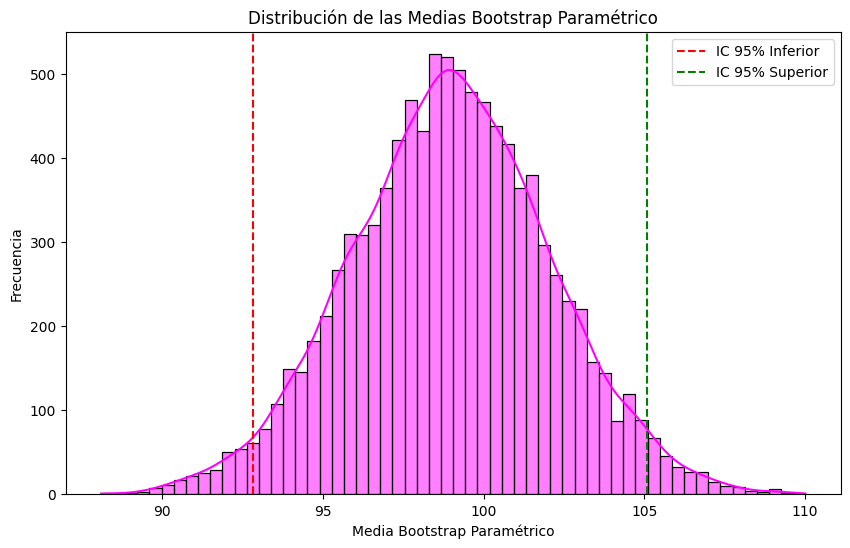

(92.81485102122625, 105.0798631240989)

In [4]:
from scipy.stats import norm

# Generando una muestra de datos simulados
np.random.seed(20)
muestra_datos = np.random.normal(100, 15, 30)  # media=100, sd=15, n=30

# Ajuste del modelo paramétrico: estimación de parámetros
mu_estimada = np.mean(muestra_datos)
sigma_estimada = np.std(muestra_datos, ddof=1)

# Generación de muestras bootstrap a partir del modelo paramétrico ajustado
B = 10000  # Número de muestras bootstrap
medias_bootstrap_parametrico = norm.rvs(loc=mu_estimada, scale=sigma_estimada, size=(B, len(muestra_datos))).mean(axis=1)

# Calculando el intervalo de confianza del 95% usando el método percentil
IC_inferior = np.percentile(medias_bootstrap_parametrico, 2.5)
IC_superior = np.percentile(medias_bootstrap_parametrico, 97.5)

# Creando un DataFrame para las medias bootstrap y generando un gráfico
df_medias_bootstrap_parametrico = pd.DataFrame({'Medias Bootstrap Paramétrico': medias_bootstrap_parametrico})

plt.figure(figsize=(10, 6))
sns.histplot(df_medias_bootstrap_parametrico['Medias Bootstrap Paramétrico'], kde=True, color='magenta')
plt.title('Distribución de las Medias Bootstrap Paramétrico')
plt.xlabel('Media Bootstrap Paramétrico')
plt.ylabel('Frecuencia')
plt.axvline(x=IC_inferior, color='red', linestyle='--', label='IC 95% Inferior')
plt.axvline(x=IC_superior, color='green', linestyle='--', label='IC 95% Superior')
plt.legend()
plt.show()

(IC_inferior, IC_superior)

La distribución de las medias calculadas a partir de 10,000 muestras bootstrap paramétricas muestra cómo varían estas medias alrededor de la estimación de la media poblacional, basada en el modelo normal ajustado a los datos de la muestra. El histograma, coloreado de magenta, representa esta distribución, con las líneas roja y verde discontinuas marcando los límites inferior y superior del intervalo de confianza del 95%, respectivamente.

El intervalo de confianza del 95% para la media poblacional, estimado utilizando el método bootstrap paramétrico, es aproximadamente de $(92.81)$ a $(105.08)$. Esto significa que, basándonos en nuestro modelo paramétrico ajustado y la técnica de re-muestreo, podemos estar un 95% confiados de que la verdadera media de la población se encuentra dentro de este rango.

Este ejemplo ilustra cómo el bootstrap paramétrico puede ser utilizado para estimar intervalos de confianza cuando se asume un modelo específico para los datos. Al ajustar un modelo a la muestra y luego simular repetidamente a partir de este modelo, el método proporciona una manera flexible y poderosa de realizar inferencias estadísticas, especialmente útil en situaciones donde el tamaño de la muestra original es pequeño o se desea incorporar conocimientos previos sobre la distribución de los datos.

## **6.5 Bootstrapping en regresión**

El **bootstrapping en regresión** se refiere al uso del método bootstrap para estimar la distribución de los coeficientes estimados en un modelo de regresión lineal, así como otras cantidades de interés, como el error estándar de estos coeficientes, valores $(t)$, y la significancia estadística. Esto es particularmente útil en situaciones donde las suposiciones estándar sobre los residuos (normalidad, homoscedasticidad, independencia) pueden no cumplirse completamente.

**Proceso Básico para el Bootstrapping en Regresión**

1. **Ajuste del Modelo Inicial:** Ajustar un modelo de regresión lineal a la muestra de datos original para estimar los coeficientes $(\hat{\beta})$.
2. **Re-muestreo con Reemplazo:** Generar múltiples "muestras bootstrap" de los datos originales re-muestreando observaciones con reemplazo.
3. **Ajuste de Modelos a las Muestras Bootstrap:** Ajustar el mismo modelo de regresión a cada muestra bootstrap y obtener los coeficientes estimados.
4. **Estimación de Distribuciones:** Usar las distribuciones de los coeficientes obtenidos de los modelos ajustados a las muestras bootstrap para estimar el error estándar, intervalos de confianza, etc.

**Fórmula para el Modelo de Regresión Lineal**

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_kX_k + \epsilon$

Donde $(Y)$ es la variable dependiente, $(X_i)$ son las variables independientes, $(\beta_i)$ son los coeficientes de la regresión, y $(\epsilon)$ es el término de error.

**Ejemplo: Bootstrapping en Regresión Lineal**

Supongamos que queremos explorar el efecto de una o varias variables independientes sobre una variable dependiente y estimar el error estándar de los coeficientes de regresión usando bootstrapping. Para ilustrar esto, generaremos datos simulados para una regresión lineal simple y aplicaremos bootstrapping para estimar el error estándar de los coeficientes.

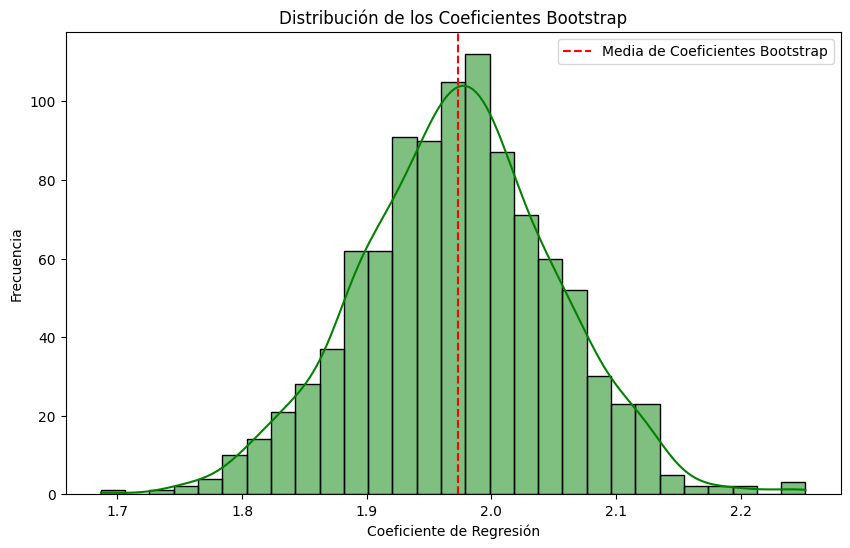

(0.0786690557045827, 1.972934838633959)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Generando datos simulados para regresión
np.random.seed(21)
X = np.random.normal(10, 2, 100)  # Variable independiente
y = 3 + 2 * X + np.random.normal(0, 2, 100)  # Variable dependiente

# Ajustando el modelo de regresión lineal a la muestra original
modelo_original = LinearRegression().fit(X.reshape(-1, 1), y)

# Bootstrapping
n_bootstraps = 1000
coeficientes_bootstrap = []

for _ in range(n_bootstraps):
    X_b, y_b = resample(X, y)
    modelo_bootstrap = LinearRegression().fit(X_b.reshape(-1, 1), y_b)
    coeficientes_bootstrap.append(modelo_bootstrap.coef_[0])

# Calculando el error estándar de los coeficientes bootstrap
error_estandar_bootstrap = np.std(coeficientes_bootstrap, ddof=1)

# Visualización de la distribución de los coeficientes bootstrap
plt.figure(figsize=(10, 6))
sns.histplot(coeficientes_bootstrap, kde=True, color='green')
plt.title('Distribución de los Coeficientes Bootstrap')
plt.xlabel('Coeficiente de Regresión')
plt.ylabel('Frecuencia')
plt.axvline(x=np.mean(coeficientes_bootstrap), color='red', linestyle='--', label='Media de Coeficientes Bootstrap')
plt.legend()
plt.show()

(error_estandar_bootstrap, np.mean(coeficientes_bootstrap))

La distribución de los coeficientes obtenidos a partir de 1000 muestras bootstrap revela cómo estos coeficientes varían debido a la variabilidad en las muestras re-muestreadas. La media de los coeficientes bootstrap es aproximadamente $(1.97)$, cercana al valor verdadero usado para generar los datos $(2)$, y el error estándar de estos coeficientes es aproximadamente $(0.079)$.

El histograma muestra la distribución de los coeficientes de regresión obtenidos de los modelos ajustados a las muestras bootstrap, con la línea roja discontinua indicando la media de estos coeficientes. La estrechez de la distribución sugiere que, aunque hay alguna variación en los coeficientes debido al re-muestreo, en general, los coeficientes tienden a agruparse alrededor del valor verdadero.

Este ejemplo ilustra cómo el bootstrapping puede ser utilizado en el contexto de la regresión para estimar la variabilidad de los coeficientes y proporcionar una medida robusta de su incertidumbre. A través del re-muestreo con reemplazo y el ajuste de modelos repetidos, podemos obtener una estimación empírica del error estándar de los coeficientes sin depender de suposiciones estrictas sobre la forma de la distribución de los errores o la estructura del modelo.

## **6.6 Relaciones entre dos variables categóricas**

Las relaciones entre dos variables categóricas se pueden analizar y comprender mediante el uso de **tablas de contingencia** y **pruebas estadísticas** específicas, como la prueba de **Chi-cuadrado $(\chi^2)$** para independencia. Este enfoque permite investigar si existe una asociación o dependencia significativa entre las dos variables categóricas.

**Tablas de Contingencia**

Una tabla de contingencia es un tipo de tabla en un formato matricial que muestra la distribución de frecuencias (o frecuencias relativas) de las variables. Permite visualizar y analizar la relación entre dos variables categóricas.

**Prueba de Chi-cuadrado para Independencia**

La prueba $(\chi^2)$ para independencia evalúa si hay una relación significativa entre dos variables categóricas. La hipótesis nula $(H_0)$ asume que las dos variables son independientes, mientras que la hipótesis alternativa $(H_a)$ sugiere que hay dependencia.

**Fórmula del estadístico $(\chi^2)$:**

$\chi^2 = \sum \frac{(O - E)^2}{E}$

donde:

- $(O)$ representa las frecuencias observadas en cada categoría de la tabla de contingencia,
- $(E)$ son las frecuencias esperadas si las dos variables fueran independientes, calculadas como $(E = \frac{\text{total fila} \times \text{total columna}}{\text{total general}})$.

**Ejemplo: Relación entre Preferencia de Marca y Género**

Supongamos que queremos analizar la relación entre la preferencia de marca (Marca A vs. Marca B) y el género (Masculino vs. Femenino). Para este propósito, simularemos algunos datos y utilizaremos una tabla de contingencia junto con la prueba de $(\chi^2)$ para evaluar la independencia.

Vamos a crear un DataFrame con datos simulados y realizar los análisis correspondientes.

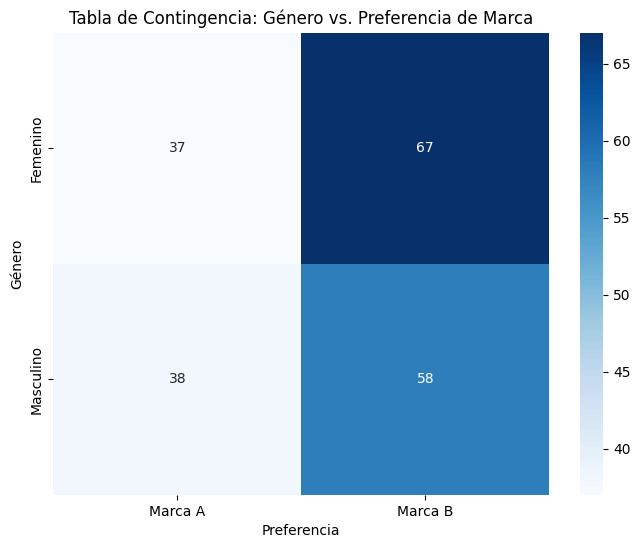

(0.19230769230769232, 0.6610028456239789)

In [6]:
from scipy.stats import chi2_contingency

# Simulando datos
np.random.seed(22)
data = {'Género': np.random.choice(['Masculino', 'Femenino'], 200, p=[0.5, 0.5]),
        'Preferencia': np.random.choice(['Marca A', 'Marca B'], 200, p=[0.4, 0.6])}

df = pd.DataFrame(data)

# Creando la tabla de contingencia
tabla_contingencia = pd.crosstab(df['Género'], df['Preferencia'])

# Realizando la prueba de Chi-cuadrado
chi2, p_valor, dof, _ = chi2_contingency(tabla_contingencia)

# Visualización de la tabla de contingencia
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, cmap='Blues', fmt='g')
plt.title('Tabla de Contingencia: Género vs. Preferencia de Marca')
plt.ylabel('Género')
plt.xlabel('Preferencia')
plt.show()

(chi2, p_valor)

La tabla de contingencia visualizada muestra la distribución de frecuencias de la preferencia de marca por género. A partir de esta tabla, hemos calculado el estadístico $(\chi^2)$ y el valor $(p)$, que son aproximadamente $(0.19)$ y $(0.66)$, respectivamente.

El valor $(p)$ obtenido sugiere que, con un nivel de significancia típico de $(\alpha = 0.05)$, no hay suficiente evidencia para rechazar la hipótesis nula de independencia entre género y preferencia de marca. En términos prácticos, esto significa que, basándonos en nuestros datos simulados, no parece haber una asociación significativa entre el género de los individuos y su preferencia por la Marca A o la Marca B.

Este ejemplo ilustra cómo se pueden utilizar las tablas de contingencia y la prueba de $(\chi^2)$ para investigar las relaciones entre dos variables categóricas. A pesar de que estos datos son simulados y el resultado específico puede variar con diferentes conjuntos de datos, el proceso analítico es un enfoque estándar para explorar y probar la independencia entre variables categóricas en estudios reales.

## **6.7 La prueba Chi-cuadrado para la bondad del ajuste**

La **prueba Chi-cuadrado $(\chi^2)$ para la bondad del ajuste** es una técnica estadística utilizada para determinar si una muestra de datos se ajusta a una distribución esperada. Es útil para probar hipótesis sobre la frecuencia con la que ocurren diferentes categorías en una población, comparando las frecuencias observadas en los datos con las frecuencias esperadas si la hipótesis nula fuera cierta.

**Hipótesis en la Prueba de Bondad del Ajuste**

- **Hipótesis Nula $(H_0)$**: No hay diferencia significativa entre las frecuencias observadas y las esperadas. Las observaciones se ajustan a la distribución esperada.

- **Hipótesis Alternativa $(H_a)$**: Existe una diferencia significativa entre las frecuencias observadas y las esperadas. Las observaciones no se ajustan a la distribución esperada.

**Fórmula del Estadístico $(\chi^2)$**

El estadístico $(\chi^2)$ se calcula como:

$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$

Donde:

- $(O_i)$ es la frecuencia observada de la categoría $(i)$,
- $(E_i)$ es la frecuencia esperada de la categoría $(i)$,
- La suma se extiende sobre todas las categorías.

El valor calculado de $(\chi^2)$ se compara con un valor crítico de la distribución $(\chi^2)$ con $(k-1)$ grados de libertad, donde $(k)$ es el número de categorías. Si el valor calculado excede el valor crítico, se rechaza la hipótesis nula en favor de la alternativa.

**Ejemplo: Prueba de Bondad del Ajuste para una Distribución de Dados**

Supongamos que queremos probar si un dado es justo, es decir, si cada uno de los seis lados tiene la misma probabilidad de aparecer en una serie de lanzamientos. Simularemos los resultados de lanzar un dado 600 veces y usaremos la prueba de $(\chi^2)$ para la bondad del ajuste para comparar las frecuencias observadas con las esperadas bajo la suposición de un dado justo.

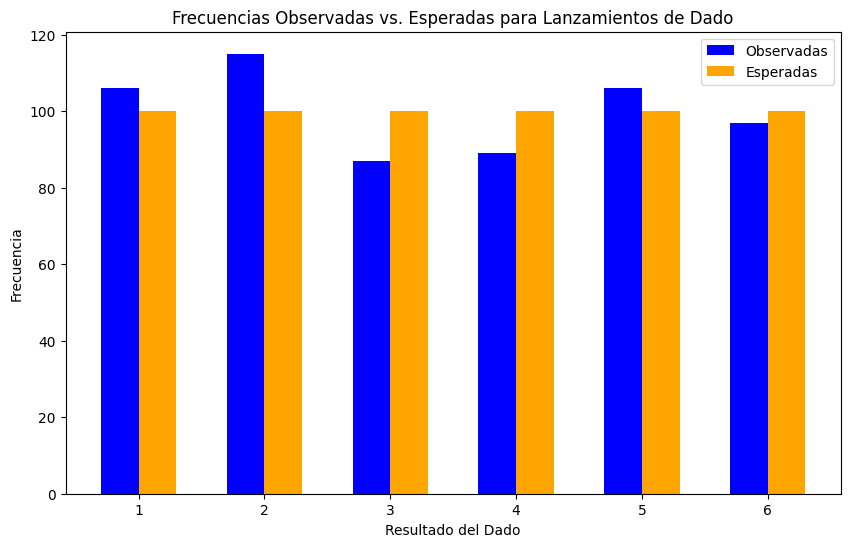

(5.96, 0.31013057446356246)

In [7]:
from scipy.stats import chisquare

# Simulando lanzamientos de un dado justo 600 veces
np.random.seed(23)
lanzamientos = np.random.choice([1, 2, 3, 4, 5, 6], 600, replace=True)

# Creando el DataFrame de frecuencias observadas
df_lanzamientos = pd.DataFrame(lanzamientos, columns=['Resultado'])
frecuencias_observadas = df_lanzamientos['Resultado'].value_counts().sort_index()

# Frecuencias esperadas para un dado justo (600 lanzamientos / 6 lados)
frecuencias_esperadas = np.array([100, 100, 100, 100, 100, 100])

# Corrigiendo el cálculo de la prueba de Chi-cuadrado para la bondad del ajuste
chi2_stat, p_valor = chisquare(f_obs=frecuencias_observadas, f_exp=frecuencias_esperadas)

# Corrigiendo la visualización
plt.figure(figsize=(10, 6))
plt.bar(frecuencias_observadas.index - 0.15, frecuencias_observadas, width=0.3, label='Observadas', color='blue')
plt.bar(frecuencias_observadas.index + 0.15, frecuencias_esperadas, width=0.3, label='Esperadas', color='orange')
plt.xticks([1, 2, 3, 4, 5, 6])
plt.title('Frecuencias Observadas vs. Esperadas para Lanzamientos de Dado')
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

(chi2_stat, p_valor)

La prueba $(\chi^2)$ para la bondad del ajuste produce un estadístico de prueba de aproximadamente $(5.96)$ y un valor $(p)$ de aproximadamente $(0.31)$. Esto indica que, con un nivel de significancia típico de $(\alpha = 0.05)$, no hay suficiente evidencia para rechazar la hipótesis nula; es decir, las frecuencias observadas de los lanzamientos del dado no difieren significativamente de lo que esperaríamos de un dado justo.

El gráfico muestra las frecuencias observadas y esperadas para cada resultado del dado, con las barras azules representando las observadas y las naranjas las esperadas. La relativa similitud entre las frecuencias observadas y esperadas, y el alto valor $(p)$, sugieren que el dado se comporta de manera justa según nuestra muestra de datos.

Este ejemplo ilustra cómo se puede utilizar la prueba $(\chi^2)$ para la bondad del ajuste para comparar las frecuencias observadas en los datos con un modelo teórico o esperado. En este caso, el análisis sugiere que no hay evidencia de que el dado sea injusto, lo que nos permite concluir que los resultados del dado siguen la distribución esperada bajo la suposición de equidad.

## **6.8 La prueba Chi-cuadrado de homogeneidad e independencia**

Las **pruebas Chi-cuadrado $(\chi^2)$ de homogeneidad e independencia** son técnicas estadísticas utilizadas para analizar tablas de contingencia, pero cada una se aplica en diferentes contextos.

**Prueba $(\chi^2)$ de Independencia**

Esta prueba se usa para determinar si existe una relación entre dos variables categóricas en una población. La hipótesis nula $(H_0)$ afirma que no hay asociación entre las variables (son independientes), mientras que la hipótesis alternativa $(H_a)$ sugiere que existe una relación (son dependientes).

**Fórmula del estadístico $(\chi^2)$:**

$\chi^2 = \sum \frac{(O - E)^2}{E}$

Donde:

- $(O)$ son las frecuencias observadas,
- $(E)$ son las frecuencias esperadas bajo la hipótesis nula, calculadas como $E = \frac{\text{total fila} \times \text{total columna}}{\text{total general}}$.

**Prueba $(\chi^2)$ de Homogeneidad**

Esta prueba compara las distribuciones de una variable categórica entre diferentes grupos o poblaciones para ver si son iguales (homogéneas). Al igual que la prueba de independencia, utiliza el estadístico $(\chi^2)$ para evaluar la diferencia entre las frecuencias observadas y las esperadas.

La diferencia principal entre ambas pruebas radica en el planteamiento de la pregunta de investigación: la prueba de independencia se pregunta si dos variables en una población están relacionadas, mientras que la prueba de homogeneidad investiga si las distribuciones de una variable categórica son las mismas en diferentes poblaciones.

**Ejemplo: Prueba $(\chi^2)$ de Independencia**

Supongamos que queremos investigar si hay una relación entre el género (masculino, femenino) y la preferencia de un nuevo producto (sí, no). Generaremos datos simulados para este propósito y aplicaremos la prueba $(\chi^2)$ de independencia.

**Ejemplo: Prueba $(\chi^2)$ de Homogeneidad**

Imaginemos que queremos comparar si la preferencia por un producto es igual entre diferentes grupos de edad (jóvenes, adultos, mayores). Para simplificar, nos centraremos primero en el ejemplo de independencia.

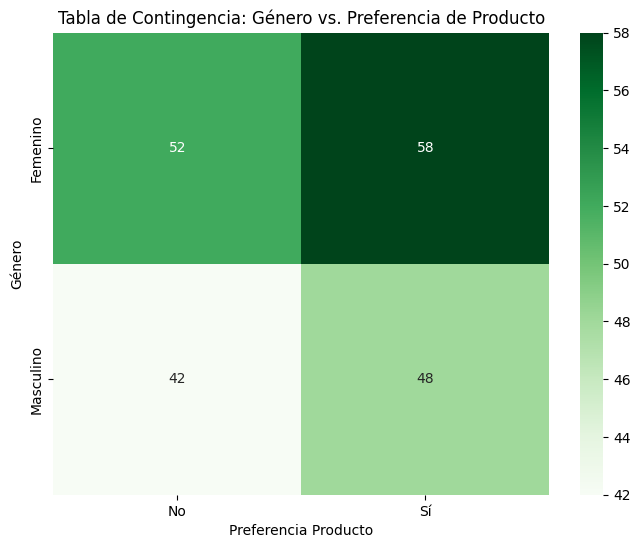

(0.0, 1.0)

In [8]:
# Ejemplo de prueba Chi-cuadrado de Independencia
# Simulando datos
np.random.seed(24)
genero = np.random.choice(['Masculino', 'Femenino'], 200, p=[0.5, 0.5])
preferencia_producto = np.random.choice(['Sí', 'No'], 200, p=[0.5, 0.5])
df_independencia = pd.DataFrame({'Género': genero, 'Preferencia Producto': preferencia_producto})

# Creando la tabla de contingencia
tabla_independencia = pd.crosstab(df_independencia['Género'], df_independencia['Preferencia Producto'])

# Realizando la prueba de Chi-cuadrado de Independencia
chi2_indep, p_valor_indep, dof_indep, _ = chi2_contingency(tabla_independencia)

# Visualización de la tabla de contingencia
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_independencia, annot=True, cmap='Greens', fmt='g')
plt.title('Tabla de Contingencia: Género vs. Preferencia de Producto')
plt.show()

(chi2_indep, p_valor_indep)

La prueba $(\chi^2)$ de independencia produce un estadístico de prueba de $(0.0)$ y un valor $(p)$ de $(1.0)$, indicando que, con un nivel de significancia típico de $(\alpha = 0.05)$, no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que, basándonos en nuestros datos simulados, no parece haber una relación estadísticamente significativa entre el género de los individuos y su preferencia por el nuevo producto. Las frecuencias observadas en cada categoría son lo que esperaríamos si género y preferencia de producto fueran independientes uno del otro.

La tabla de contingencia visualizada muestra la distribución de frecuencias de la preferencia de producto por género, con números que representan el conteo de respuestas en cada combinación de categorías. El resultado de la prueba refleja que la distribución de las preferencias del producto no difiere significativamente entre los géneros masculino y femenino en esta muestra simulada.

Este análisis proporciona un ejemplo claro de cómo se puede utilizar la prueba $(\chi^2)$ de independencia para explorar relaciones entre variables categóricas y tomar decisiones basadas en evidencia estadística.

## **6.9 Remuestreo**

El **remuestreo** es una técnica estadística poderosa que implica repetidamente muestrear valores de los datos observados, con el objetivo de estimar una variedad de propiedades estadísticas, como la varianza, sesgo, y intervalos de confianza. Esta técnica es muy utilizada para la validación de modelos en estadísticas inferenciales y se aplica principalmente en dos formas: el **bootstrapping** y la **permutación**.

**Tipos de Remuestreo**

**Bootstrapping**: Esta técnica implica muestrear con reemplazo de un conjunto de datos para formar "muestras bootstrap", que son colecciones de tamaño similar al conjunto de datos original. Estas muestras se utilizan para obtener estimaciones de la distribución de una estadística (por ejemplo, la media o la mediana).

**Pruebas de Permutación (o Pruebas de Randomización)**: Involucran la reorganización de los datos observados para probar la hipótesis de que dos variables son independientes, sin suponer una distribución específica de los datos.

**Ejemplo Práctico con Bootstrapping**

Supongamos que tenemos un conjunto de datos pequeño y queremos estimar la media y su incertidumbre (intervalo de confianza).

**Datos Observados**

$X = [20, 22, 19, 24, 21]$

Queremos estimar la media de esta población y el intervalo de confianza del 95% para la media.

**Método de Bootstrapping**

**Generar Muestras Bootstrap**: Extraer muestras del mismo tamaño que el conjunto de datos original, con reemplazo, de los datos existentes.

**Calcular Estadísticas**: Calcular la media para cada muestra bootstrap.
**Estimar el Intervalo de Confianza**: Usar el percentil para obtener el intervalo de confianza.

**Implementación en Python**

Aquí está cómo podríamos implementar un análisis de bootstrapping en Python:

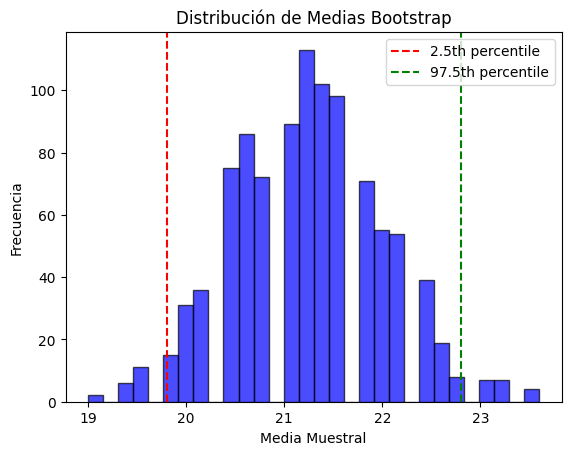

Media observada: 21.20
Intervalo de confianza del 95% para la media: [19.8 22.8]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Datos originales
data = np.array([20, 22, 19, 24, 21])

# Número de muestras bootstrap
n_bootstrap = 1000

# Generar muestras bootstrap y calcular medias
bootstrap_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)]

# Calcular el intervalo de confianza del 95%
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Visualización de las medias bootstrap
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='2.5th percentile')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='97.5th percentile')
plt.title('Distribución de Medias Bootstrap')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

print(f"Media observada: {np.mean(data):.2f}")
print(f"Intervalo de confianza del 95% para la media: {confidence_interval}")

**Interpretación**

- **Histograma**: Muestra la distribución de las medias calculadas a partir de las muestras bootstrap. Las líneas roja y verde indican el intervalo de confianza del 95%, mostrando dónde esperamos que caiga la verdadera media de la población la mayoría del tiempo.

- **Intervalo de Confianza**: Proporciona una estimación de dónde esperamos que esté la media real basada en nuestro conjunto de datos actual.

El bootstrapping es una técnica extremadamente útil en estadística, especialmente cuando el tamaño de la muestra es pequeño o cuando el modelo subyacente de los datos es desconocido. Permite realizar inferencias estadísticas robustas sin muchas suposiciones sobre la forma de la distribución de la población.

## **6.10 Análisis de datos categóricos**

El **análisis de datos categóricos** se refiere al manejo y análisis de datos que pueden ser clasificados en categorías mutuamente excluyentes, pero no necesariamente ordenadas. Estos datos son típicamente nominales o ordinales. Ejemplos de datos categóricos incluyen género, tipo de vehículo, marca de productos, respuesta en encuestas con opciones como "sí", "no", y "quizás", entre otros.

**Técnicas Comunes en el Análisis de Datos Categóricos**

**Tablas de Contingencia**: Resumen de la distribución de frecuencias de las categorías mutuamente exclusivas.

**Test Chi-Cuadrado de Independencia**: Prueba para determinar si hay una relación significativa entre dos variables categóricas.

**Análisis de la Varianza (ANOVA) para Datos Categóricos**: Utilizado cuando la variable dependiente es numérica pero la independiente es categórica, como en el caso de comparar grupos.

**Modelos de Regresión Logística**: Usados cuando la variable de respuesta es categórica, comúnmente binaria, como "éxito" o "fracaso".

**Ejemplo Práctico: Análisis de Encuesta de Satisfacción**

Supongamos que una empresa ha realizado una encuesta de satisfacción con tres posibles respuestas: "Satisfecho", "Neutral" y "Insatisfecho". Los resultados se cruzan con la categoría de clientes: "Nuevo" y "Recurrente".

**Datos Simulados**

```plaintext
                   Satisfecho    Neutral    Insatisfecho
Nuevo             90           60          30
Recurrente       100           80          20
```

**Objetivo**

Determinar si hay una diferencia significativa en la distribución de satisfacción entre clientes nuevos y recurrentes.

**Métodos y Cálculos en Python**

**Crear una Tabla de Contingencia**.

**Realizar un Test Chi-Cuadrado de Independencia**.

**Implementación en Python**

Tabla de Contingencia:
            Satisfecho  Neutral  Insatisfecho
Nuevo               90       60            30
Recurrente         100       80            20

Chi-cuadrado Estadístico: 4.34285714285714
Valor-p: 0.11401462248184772
Grados de libertad: 2
Frecuencias esperadas:
[[ 90.          66.31578947  23.68421053]
 [100.          73.68421053  26.31578947]]


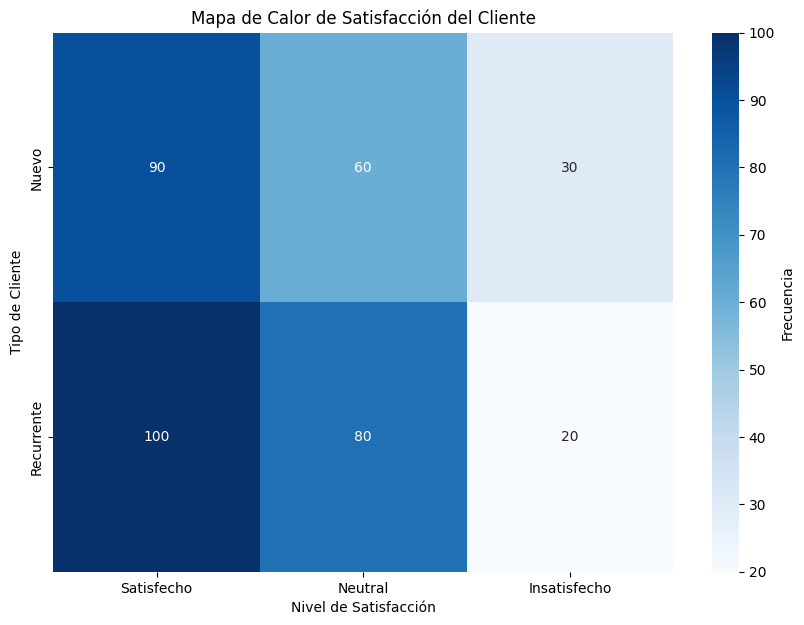

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Crear los datos
data = np.array([[90, 60, 30], [100, 80, 20]])
df = pd.DataFrame(data, columns=["Satisfecho", "Neutral", "Insatisfecho"], index=["Nuevo", "Recurrente"])

# Tabla de contingencia
print("Tabla de Contingencia:")
print(df)

# Test Chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(df)

print("\nChi-cuadrado Estadístico:", chi2)
print("Valor-p:", p_value)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")
print(expected)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(df, annot=True, cmap="Blues", fmt="d", cbar_kws={'label': 'Frecuencia'})
plt.title("Mapa de Calor de Satisfacción del Cliente")
plt.ylabel("Tipo de Cliente")
plt.xlabel("Nivel de Satisfacción")
plt.show()

**Interpretación**

- **Tabla de Contingencia**: Muestra las frecuencias observadas de las respuestas en las categorías de clientes.

- **Chi-Cuadrado Estadístico y Valor-p**: Indican si las diferencias entre las categorías son estadísticamente significativas. Un valor $(p)$ bajo (p.ej., menor que 0.05) sugiere que hay diferencias significativas entre los grupos.

- **Frecuencias Esperadas**: Estas son las frecuencias que esperaríamos obtener si no hubiera ninguna asociación entre las categorías de clientes y las respuestas de satisfacción.

- **Mapa de Calor**: Visualiza la distribución de las respuestas, ayudando a identificar visualmente las diferencias entre los grupos.

Este análisis ayuda a comprender cómo se distribuyen las respuestas de satisfacción entre diferentes tipos de clientes y si esa distribución es aleatoria o muestra patrones específicos.

| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./05_Intervalos_de_Confianza.ipynb)| [⏩](./07_Analisis_de_varianza_unidireccional.ipynb)|